In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', None)

base_color = sb.color_palette()[0]

## Dataset Overview

Data name: Loan Data from Prosper.

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [3]:
df.head(4)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                   0.0796         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                   0.0849         0.0249   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1           0.0547                      6.0                     A   
2              NaN                      NaN                   NaN   
3           0.0600                      6.0                     A   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0                      1                         24.0                   3.0   
1                     13                        389.0                   3.0   
2                      0                          0.0                   0.0   
3                      7                        115.0                   0.0   

   TotalInquiries  CurrentDelinquencies  AmountDelinquent  \
0             3.0                   2.0             472.0   
1             5.0                   0.0               0.0   
2             1.0                   1.0               NaN   
3             1.0                   4.0           10056.0   

   DelinquenciesLast7Years  PublicRecord

In [4]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [5]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  Tot

In [6]:
df.shape

(113937, 81)

# Exploratory Data 
## Univariate Exploration

Main variable of interest: 
 - LoanStatus(loan’s outcome)
 - BorrowerAPR
 - BorrowerRate
 
 
**LoanStatus**

In [7]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
sb.countplot(data=df, x='LoanStatus');
plt.xticks(rotation=15);

(-1.1032478348077908,
 1.1030778448419476,
 -1.1037529619968636,
 1.1025727176528748)

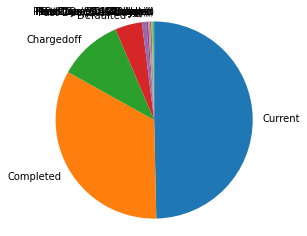

In [8]:
sorted_counts = df['LoanStatus'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square')

The most loan status are **completed** and **current**. About 50% of loan status are current.

**BorrowerAPR**

In [9]:
sb.distplot(df['BorrowerAPR'])
plt.axvline(x=df['BorrowerAPR'].mean(), color='r')
print(df['BorrowerAPR'].mean())

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.218827655909788


The mean of borrowerAPR be 0.218827655909788. Here is a high density around 0.36.

**BorrowerRate**

In [10]:
sb.distplot(df['BorrowerRate'])
plt.axvline(x=df['BorrowerRate'].mean(), color='r')
print(df['BorrowerRate'].mean())

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.1927640577687518


The mean of borrower rate be 0.1927640577687518. Here is a high density around 0.3.

The variable that may affect loan’s outcome status and borrower’s APR or interest rate:

**BorrowerState**, **Occupation**, **EmploymentStatus**, **EmploymentStatusDuration**, **DebtToIncomeRatio**, **StatedMonthlyIncome**, **MonthlyLoanPayment**, **Investors**.

**BorrowerState**

In [11]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
sb.countplot(data=df, x='BorrowerState');
plt.xticks(rotation=15);

In [12]:
sorted_counts = df['BorrowerState'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square')

(-1.1002133043068916,
 1.1022171817234672,
 -1.100519488545483,
 1.1019109974848758)

The most loan borrower state is **CA**, about 1/8 of the total amount.

**Occupation**

In [13]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
sb.countplot(data=df, x='Occupation');
plt.xticks(rotation=90);

In [14]:
df['Occupation'].describe() 

count     110349
unique        67
top        Other
freq       28617
Name: Occupation, dtype: object

In [15]:
df['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

The most loan occupation is **other**, then is **professional**. However the category **other** may not be useful, meanwhile the other categories are too diverse, **occupation** may not be very useful in our research.

**EmploymentStatus**

In [16]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
sb.countplot(data=df, x='EmploymentStatus');
plt.xticks(rotation=15);

(-1.130878550362813,
 1.1145314025048279,
 -1.1129914849886393,
 1.1324184678790015)

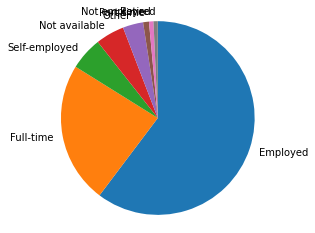

In [17]:
sorted_counts = df['EmploymentStatus'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square')

The most employment status is **employed**, then is **full-time**. More than 50% are employed.

**EmploymentStatusDuration**

In [18]:
sb.distplot(df['EmploymentStatusDuration'])
plt.axvline(x=df['EmploymentStatusDuration'].mean(), color='r')
print(df['EmploymentStatusDuration'].mean())

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


96.07158175934984


In [19]:
np.log10(df['EmploymentStatusDuration'].describe())

bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='EmploymentStatusDuration', bins=bins);
plt.xscale('log')
plt.xlabel('x-axis limits are changed, and scaled to log-type')

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

Employment status duration is a right-skewed distribution.

**DebtToIncomeRatio**

In [20]:
sb.distplot(df['DebtToIncomeRatio'])
plt.axvline(x=df['DebtToIncomeRatio'].mean(), color='r')
print(df['DebtToIncomeRatio'].mean())

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.2759466040063403


In [21]:
sb.distplot(df['DebtToIncomeRatio'])
plt.axvline(x=df['DebtToIncomeRatio'].mean(), color='r')
plt.xlim((-1,2));

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [22]:
np.log10(df['DebtToIncomeRatio'].describe())

bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins);

plt.xscale('log')

plt.xlabel('x-axis limits are changed, and scaled to log-type')

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

Debt to income ratio is a highly right-skewed distribution.

**StatedMonthlyIncome**

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


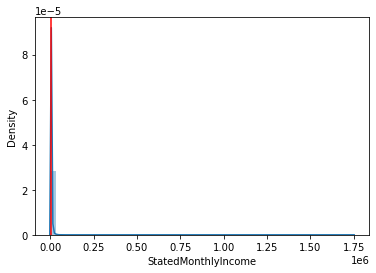

In [23]:
sb.distplot(df['StatedMonthlyIncome'])
plt.axvline(x=df['StatedMonthlyIncome'].mean(), color='r')

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

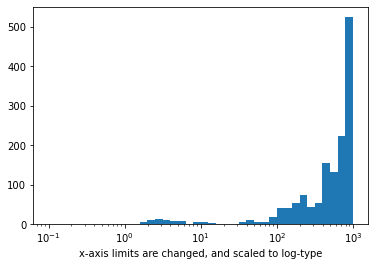

In [24]:
np.log10(df['StatedMonthlyIncome'].describe())

bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bins);

plt.xscale('log')

plt.xlabel('x-axis limits are changed, and scaled to log-type')

Stated monthly income is a right-skewed distribution.

**MonthlyLoanPayment**

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


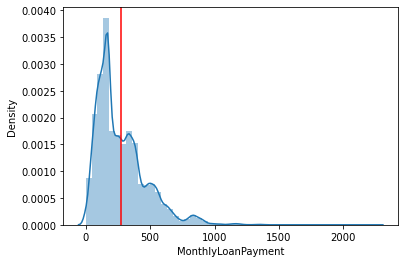

In [25]:
sb.distplot(df['MonthlyLoanPayment'])
plt.axvline(x=df['MonthlyLoanPayment'].mean(), color='r')

In [26]:
sb.distplot(df['MonthlyLoanPayment'])
plt.axvline(x=df['MonthlyLoanPayment'].mean(), color='r')
plt.xlim((-200,1200));

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

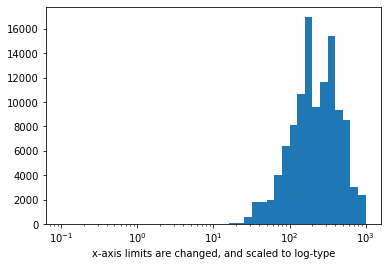

In [27]:
np.log10(df['MonthlyLoanPayment'].describe())

bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='MonthlyLoanPayment', bins=bins);

plt.xscale('log')

plt.xlabel('x-axis limits are changed, and scaled to log-type')

Monthly loan payment is a right-skewed distribution.

**Investors**

/Users/mazuisan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


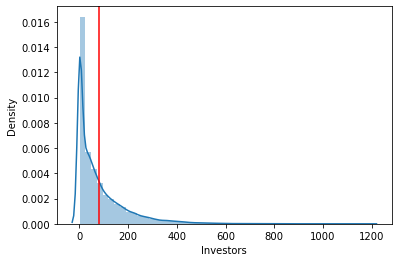

In [28]:
sb.distplot(df['Investors'])
plt.axvline(x=df['Investors'].mean(), color='r')

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

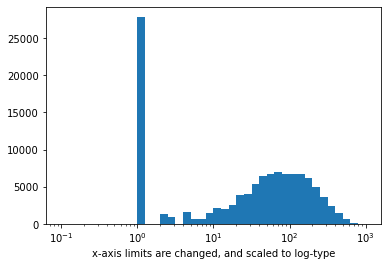

In [29]:
np.log10(df['Investors'].describe())

bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='Investors', bins=bins);

plt.xscale('log')

plt.xlabel('x-axis limits are changed, and scaled to log-type')

Investors is a right-skewed distribution.

## Bivariate Exploration

Main variable of interest: 
 - LoanStatus(loan’s outcome)
 - BorrowerAPR
 - BorrowerRate
 
 
 

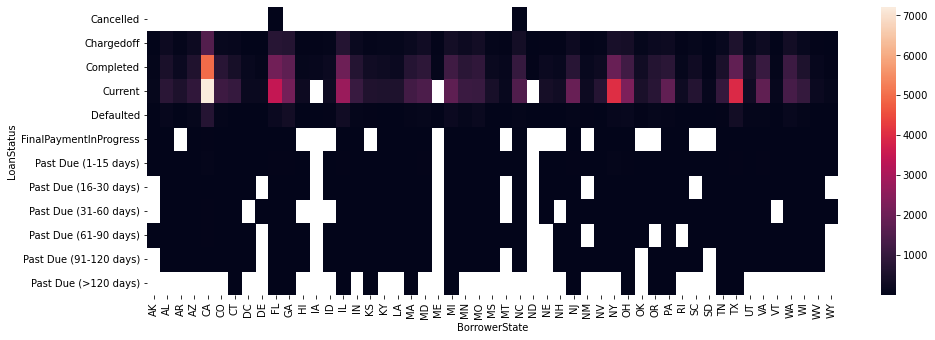

In [30]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
ct_counts = df.groupby(['LoanStatus', 'BorrowerState']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'BorrowerState', values = 'count')

sb.heatmap(ct_counts)

We have the only few coloured blocks are
 - Current + CA
 - Completed + CA
 - Current + FL
 - Current + NY
 - Current + TX
 
We also notice that, 1/8 of data are CA and 50% of the data are current.
We take a closer look to past due section, since they are all black.

In [32]:
df_group_pastDue = df.copy()
df_group_pastDue.loc[df_group_pastDue['LoanStatus'].str[:4] == 'Past', 'LoanStatus'] = 'Past Due'

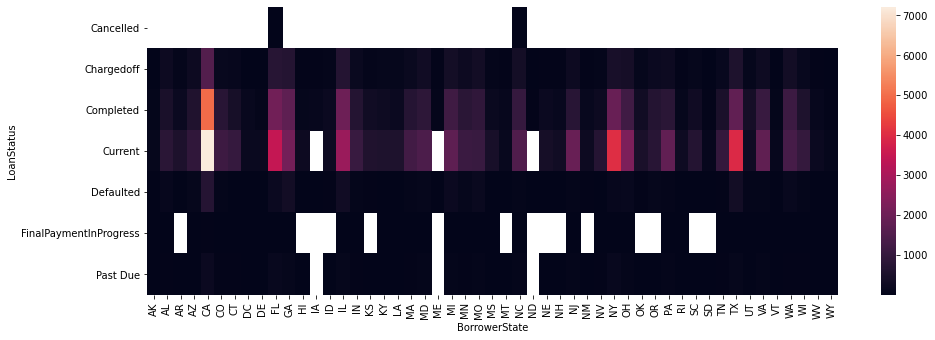

In [33]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
ct_counts = df_group_pastDue.groupby(['LoanStatus', 'BorrowerState']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'BorrowerState', values = 'count')

sb.heatmap(ct_counts)

In [34]:
df_pastDue = df.copy()

df_pastDue.drop(df_pastDue[df_pastDue['LoanStatus'].str[:4] != 'Past'].index, inplace = True)
df_pastDue.loc[df_pastDue['LoanStatus'].str[:4] == 'Past', 'LoanStatus'] = 'Past Due'

Text(0.5, 1.0, 'original')

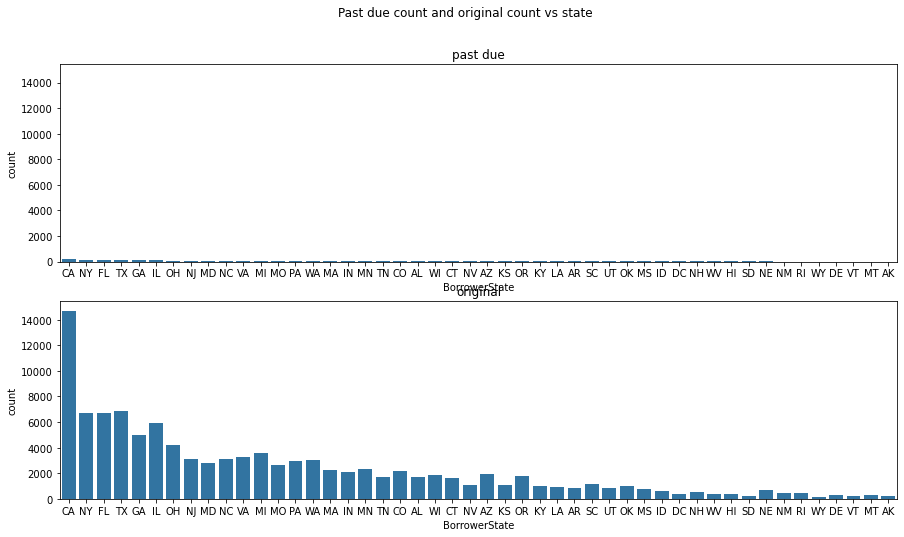

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharey=True)
fig.suptitle('Past due count and original count vs state')

sb.countplot(ax=axes[0],data=df_pastDue, x='BorrowerState', color=base_color,order = df_pastDue['BorrowerState'].value_counts().index)
axes[0].set_title('past due')

sb.countplot(ax=axes[1],data=df, x='BorrowerState', color=base_color,order = df_pastDue['BorrowerState'].value_counts().index)
axes[1].set_title('original')

In [36]:
df_Comp = df.copy()

df_Comp.drop(df_Comp[df_Comp['LoanStatus'].str[:4] != 'Comp'].index, inplace = True)

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharey=True)
fig.suptitle('Complete count and original count vs state')

sb.countplot(ax=axes[0],data=df_Comp, x='BorrowerState', color=base_color,order = df_Comp['BorrowerState'].value_counts().index)
axes[0].set_title('Complete')

sb.countplot(ax=axes[1],data=df, x='BorrowerState', color=base_color,order = df_Comp['BorrowerState'].value_counts().index)
axes[1].set_title('original')

Text(0.5, 1.0, 'original')

There is no obvious relationship between borrowerState and LoanStatus. Mostly count are depending on population on loanstatus but not on borrowstate.

**LoanStatus vs BorrowerAPR**

In [38]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
sb.violinplot(data=df, x='LoanStatus', y='BorrowerAPR', color=base_color, innner=None)
plt.xticks(rotation=15);

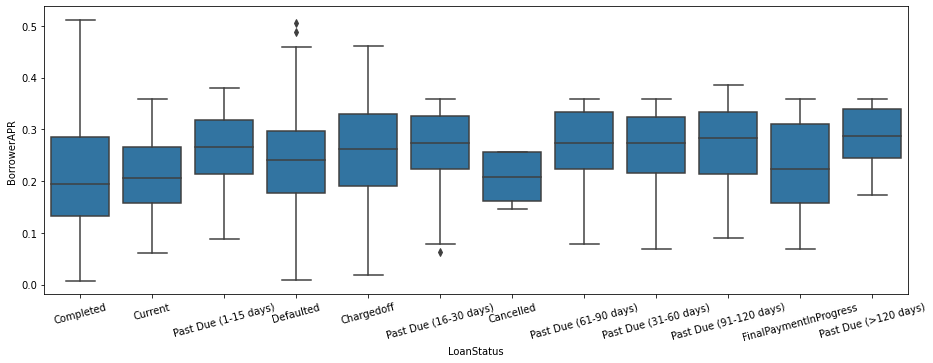

In [39]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df, x='LoanStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15);

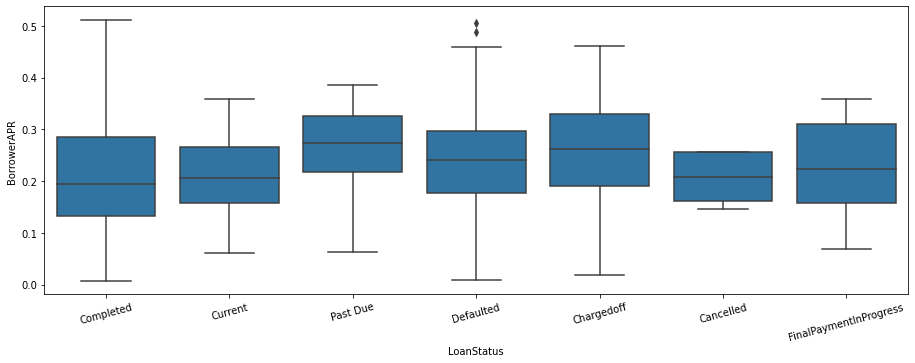

In [40]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df_group_pastDue, x='LoanStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15);

We have completed loanstatus have lowerest borrowerAPR. PastDue have the highest borrowerAPR.

**LoanStatus vs BorrowerRate**

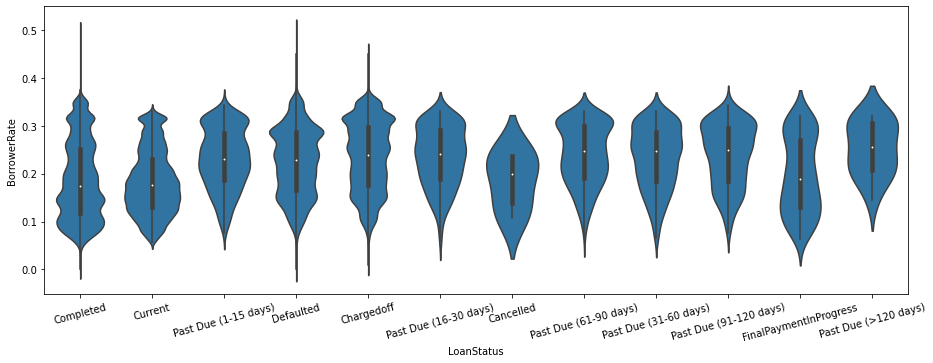

In [41]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
base_color = sb.color_palette()[0]

sb.violinplot(data=df, x='LoanStatus', y='BorrowerRate', color=base_color, innner=None)
plt.xticks(rotation=15);

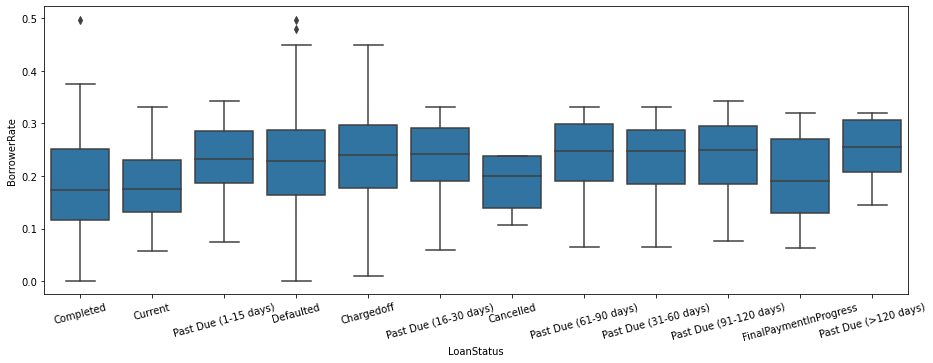

In [42]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df, x='LoanStatus', y='BorrowerRate', color=base_color)
plt.xticks(rotation=15);

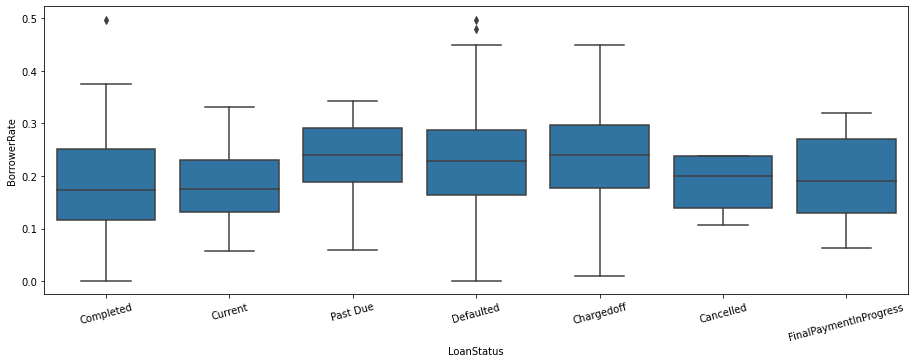

In [43]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df_group_pastDue, x='LoanStatus', y='BorrowerRate', color=base_color)
plt.xticks(rotation=15);

We have completed loanstatus have lowerest borrower rate. PastDue have the highest borrower rate, which is same as borrower rate.

**LoanStatus vs EmploymentStatus**

<AxesSubplot:xlabel='EmploymentStatus', ylabel='LoanStatus'>

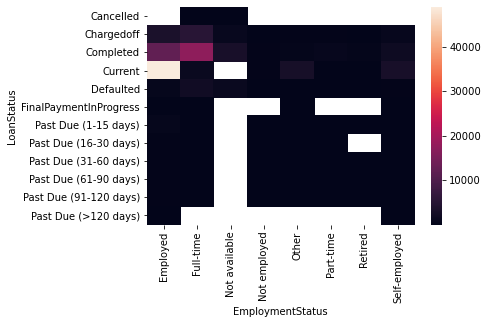

In [44]:
ct_counts = df.groupby(['LoanStatus', 'EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name='count')

ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')

sb.heatmap(ct_counts)

In [45]:
ct_counts = df_group_pastDue.groupby(['LoanStatus', 'EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')

sb.heatmap(ct_counts)

<AxesSubplot:xlabel='EmploymentStatus', ylabel='LoanStatus'>

Most current load status are loaned by employed people.

**LoanStatus vs EmploymentStatusDuration**

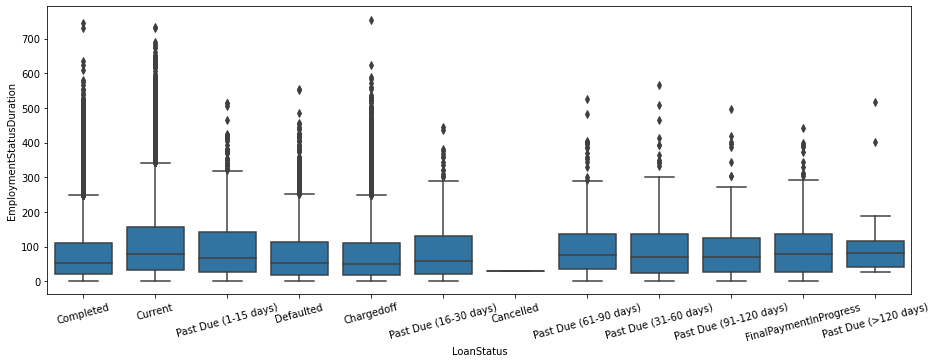

In [46]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df, x='LoanStatus', y='EmploymentStatusDuration', color=base_color)
plt.xticks(rotation=15);

In [47]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df, x='LoanStatus', y='EmploymentStatusDuration', color=base_color)
plt.xticks(rotation=15);
plt.ylim(0, 200)

(0.0, 200.0)

We have current load status be the largest employment status duration, and cancelled are smallest.

**LoanStatus vs DebtToIncomeRatio**

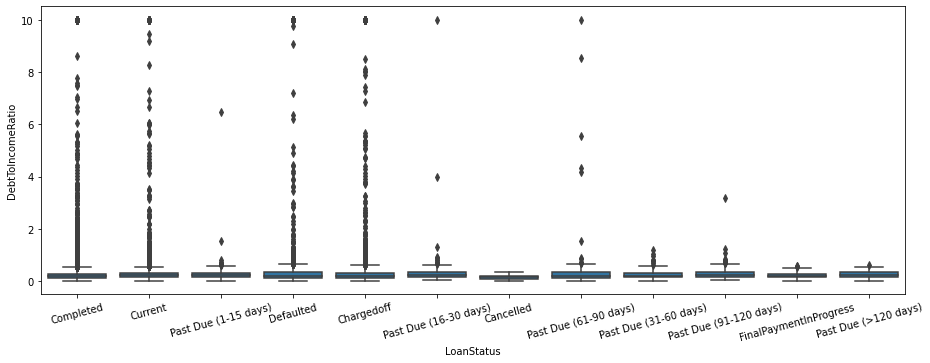

In [48]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df, x='LoanStatus', y='DebtToIncomeRatio', color=base_color)
plt.xticks(rotation=15);

In [48]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df, x='LoanStatus', y='DebtToIncomeRatio', color=base_color)
plt.xticks(rotation=15);
plt.ylim(0, 0.6)

(0.0, 0.6)

(0.0, 0.6)

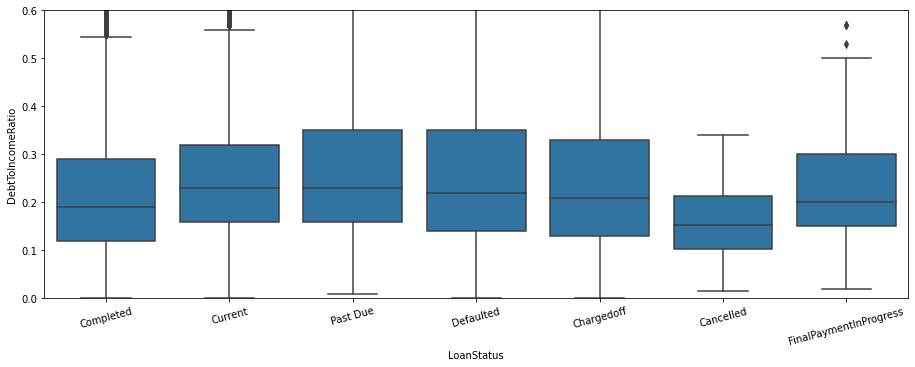

In [49]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df_group_pastDue, x='LoanStatus', y='DebtToIncomeRatio', color=base_color)
plt.xticks(rotation=15);
plt.ylim(0, 0.6)

We have cancelled load status has the lowest debt to income ratio and past due(16-30 days) have the largest debt to income ratio.

**LoanStatus vs MonthlyLoanPayment**

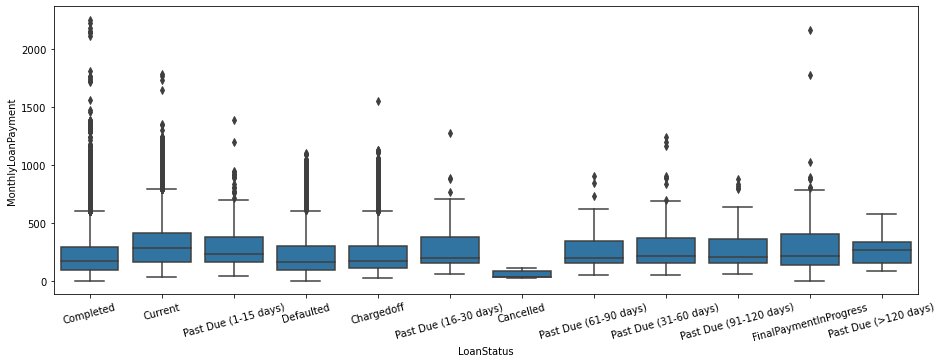

In [50]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df, x='LoanStatus', y='MonthlyLoanPayment', color=base_color)
plt.xticks(rotation=15);

(0.0, 500.0)

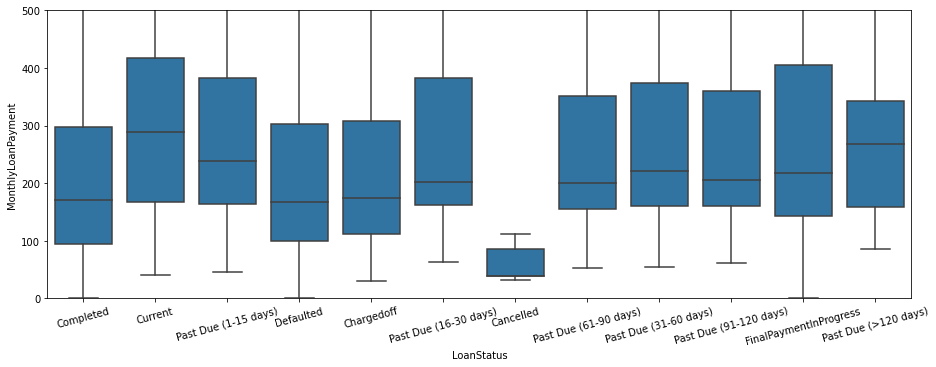

In [51]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df, x='LoanStatus', y='MonthlyLoanPayment', color=base_color)
plt.xticks(rotation=15);
plt.ylim(0, 500)

We have cancelled load status has the lowest monthly loan payment and current have the largest monthly loan payment.

**LoanStatus vs Investors**

In [52]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df, x='LoanStatus', y='Investors', color=base_color)
plt.xticks(rotation=15);

(0.0, 200.0)

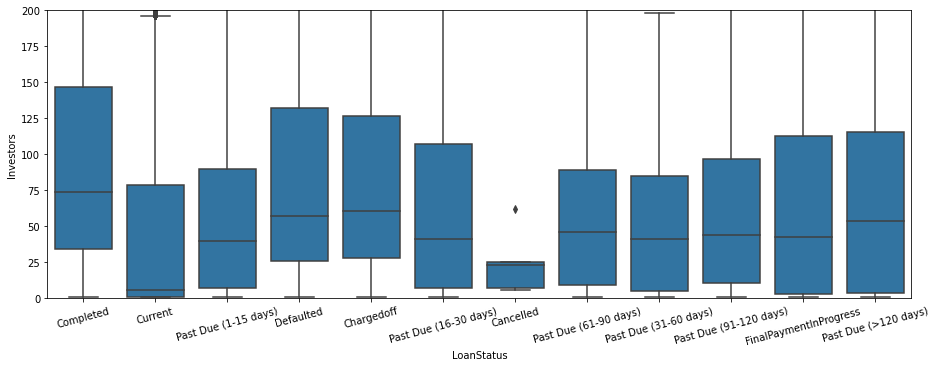

In [50]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])

sb.boxplot(data=df, x='LoanStatus', y='Investors', color=base_color)
plt.xticks(rotation=15);
plt.ylim(0, 200)

We have current load status have fewest investors, and completed load status have most investors.

**BorrowerAPR vs BorrowerState**

BorrowerAPR: we might want to find the difference of big borrowerAPR and small borrowerAPR

In [53]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])
my_order = df.groupby(by=["BorrowerState"])["BorrowerAPR"].mean().iloc[::-1].index

sb.boxplot(data=df, y='BorrowerAPR', x='BorrowerState', color=base_color,order=my_order)

Although we have the largest amount of loan in CA, CA is not having the highest borrower APR.
The higher Borrower APR are from AR and AL and MS.
The lower Borrower APR are from ME and IA.

Text(0.5, 1.0, 'big')

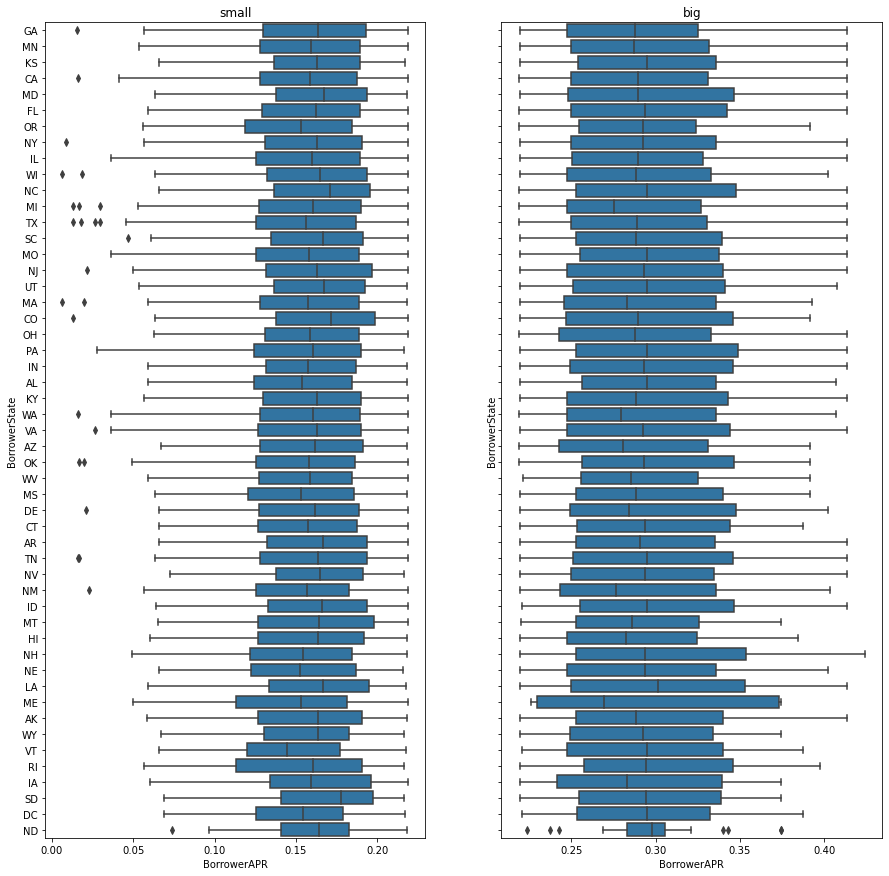

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharey=True)

df_APR_small = df[df['BorrowerAPR'] <= df['BorrowerAPR'].mean()]
df_APR_big = df[df['BorrowerAPR'] > df['BorrowerAPR'].mean()]

sb.boxplot(ax=axes[0],data=df_APR_small, x='BorrowerAPR', y='BorrowerState', color=base_color)
axes[0].set_title('small')

sb.boxplot(ax=axes[1],data=df_APR_big, x='BorrowerAPR', y='BorrowerState', color=base_color)
axes[1].set_title('big')


we notice that, among smaller BorrowerAPR  and larger BorrowerAPR, the highest and lowest states are different.

Among the larger Borrower APR, the highest is LA, lowest is ME.

Among the smaller Borrower APR, the highest is SD, lowest is VT.

**BorrowerAPR vs EmploymentStatus**

In [55]:
base_color = sb.color_palette()[0]
fig = plt.figure()
ax = fig.add_axes([.0, .0, 1, 1])

sb.boxplot(data=df, y='BorrowerAPR', x='EmploymentStatus', color=base_color)

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

sb.boxplot(ax=axes[0],data=df_APR_small, y='BorrowerAPR', x='EmploymentStatus', color=base_color)
axes[0].set_title('small')
plt.xticks(rotation=15);

sb.boxplot(ax=axes[1],data=df_APR_big, y='BorrowerAPR', x='EmploymentStatus', color=base_color)
axes[1].set_title('big')
plt.xticks(rotation=15);

Among smaller BorrowerAPR  and larger BorrowerAPR, the most and least employment status are different too.

Among the larger Borrower APR, the highest is not employed, lowest is unknown(not available).
Among the smaller Borrower APR, the highest is other status, lowest is full-time.

**BorrowerAPR vs EmploymentStatusDuration**

In [57]:
plt.scatter(data = df, x = 'BorrowerAPR', y = 'EmploymentStatusDuration', alpha=1/50);

In [58]:
bins_x = np.arange(0.0, 0.5+0.3, 0.5)
bins_y = np.arange(0, 600+100, 100)

plt.hist2d(data = df, x = 'BorrowerAPR', y = 'EmploymentStatusDuration', cmin=0.5, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('BorrowerAPR')
plt.ylabel('EmploymentStatusDuration');

There is a not clear obvious normal distribution between borrower apr and employment status duration.

**BorrowerAPR vs DebtToIncomeRatio**

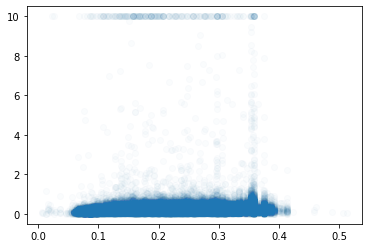

In [59]:
plt.scatter(data = df, x = 'BorrowerAPR', y = 'DebtToIncomeRatio', alpha=1/50);

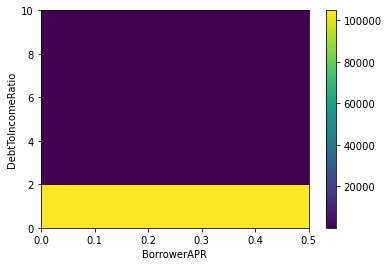

In [60]:
bins_x = np.arange(0.0, 0.5+0.3, 0.5)
bins_y = np.arange(0, 10+2, 2)

plt.hist2d(data = df, x = 'BorrowerAPR', y = 'DebtToIncomeRatio', cmin=0.5, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('BorrowerAPR')
plt.ylabel('DebtToIncomeRatio');

Mostly debt to income ratio are around 0 - 1, there are no clear relationship between borrower APR and debt to income ratio.

**BorrowerAPR vs StatedMonthlyIncome**

In [61]:
plt.scatter(data = df, x = 'BorrowerAPR', y = 'StatedMonthlyIncome', alpha=1/50);

Mostly debt to income ratio are around 0, there are no clear relationship between borrower APR and stated monthly income.

**BorrowerAPR vs MonthlyLoanPayment**

In [62]:
plt.scatter(data = df, x = 'BorrowerAPR', y = 'MonthlyLoanPayment', alpha=1/50);

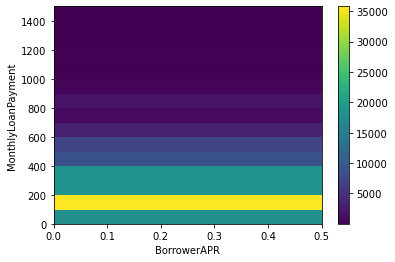

In [63]:
bins_x = np.arange(0.0, 0.5+0.3, 0.5)
bins_y = np.arange(0, 1500+100, 100)

plt.hist2d(data = df, x = 'BorrowerAPR', y = 'MonthlyLoanPayment', cmin=0.5, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('BorrowerAPR')
plt.ylabel('MonthlyLoanPayment');

There is a not obvious right skewed relationship between borrower apr and monthly load payment. Mostly Monthly loan payment are 100-200.

**BorrowerAPR vs Investors**

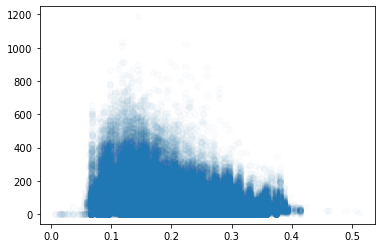

In [64]:
plt.scatter(data = df, x = 'BorrowerAPR', y = 'Investors', alpha=1/50);

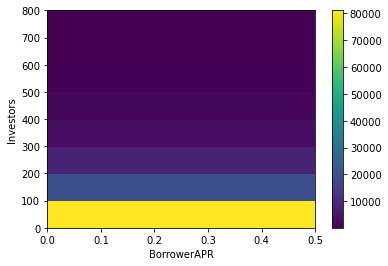

In [65]:
bins_x = np.arange(0.0, 0.5+0.3, 0.5)
bins_y = np.arange(0, 800+100, 100)

plt.hist2d(data = df, x = 'BorrowerAPR', y = 'Investors', cmin=0.5, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('BorrowerAPR');
plt.ylabel('Investors');

There is a not obvious right skewed relationship between borrower apr and investors. Mostly investors are around 1-200.

**BorrowerRate vs BorrowerState**

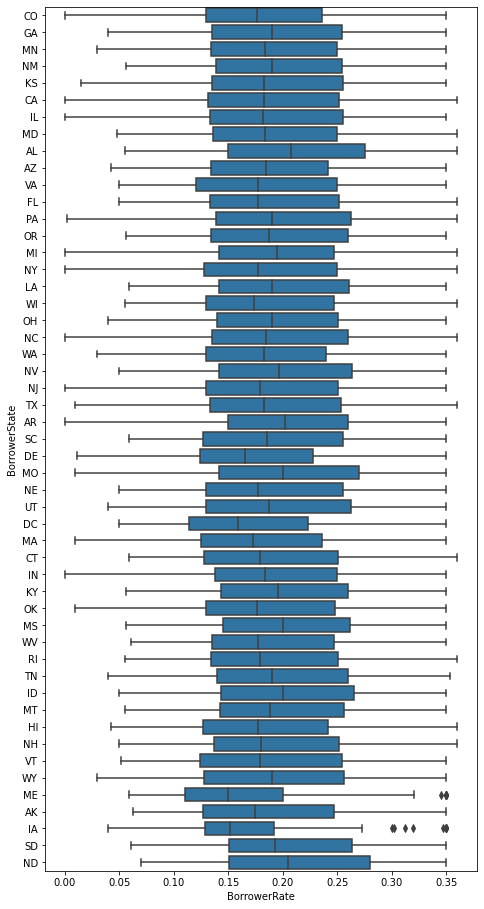

In [66]:
base_color = sb.color_palette()[0]
fig = plt.figure()
ax = fig.add_axes([.0, .0, 1, 3])

sb.boxplot(data=df, x='BorrowerRate', y='BorrowerState', color=base_color)

In [67]:
df_Rate_small = df[df['BorrowerRate'] <= df['BorrowerRate'].mean()]
df_Rate_big = df[df['BorrowerRate'] > df['BorrowerRate'].mean()]

fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharey=True)

sb.boxplot(ax=axes[0],data=df_Rate_small, y='BorrowerState', x='BorrowerRate', color=base_color)
axes[0].set_title('small')

sb.boxplot(ax=axes[1],data=df_Rate_big, y='BorrowerState', x='BorrowerRate', color=base_color)
axes[1].set_title('big')

Text(0.5, 1.0, 'big')

In general, MD, MO, AL have higher borrower rate.
IA, ME have lower borrower rate.

MD, SD, ND have higher borrower rate among lower borrower rate.
AL, OR have lower borrower rate among lower borrower rate.

ND has higher borrower rate among higher borrower rate.
IA has lower borrower rate among lower borrower rate.

**BorrowerRate vs Investors**

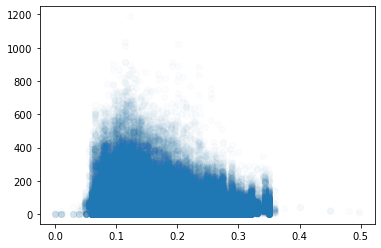

In [68]:
plt.scatter(data = df, x = 'BorrowerRate', y = 'Investors', alpha=1/50);

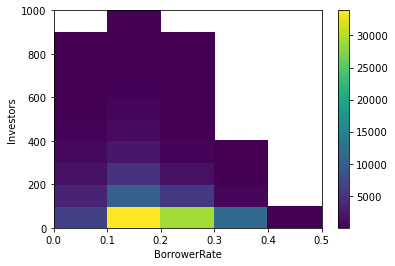

In [69]:
bins_x = np.arange(0.0, 0.5+0.1, 0.1)
bins_y = np.arange(0, 1000+100, 100)

plt.hist2d(data = df, x = 'BorrowerRate', y = 'Investors', cmin=0.5, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('BorrowerRate');
plt.ylabel('Investors');

In [70]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plt.scatter(data = df_Rate_small, x = 'BorrowerRate', y = 'Investors', alpha=1/50);

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.scatter(data = df_Rate_big, x = 'BorrowerRate', y = 'Investors', alpha=1/50);


There is a right skewed relationship between BorrowerRate and investors.

## Multivariate Exploration

Main variable of interest: 
 - LoanStatus(loan’s outcome)
 - BorrowerAPR
 - BorrowerRate
 
 
**LoanStatus vs BorrowerState vs BorrowerAPR**

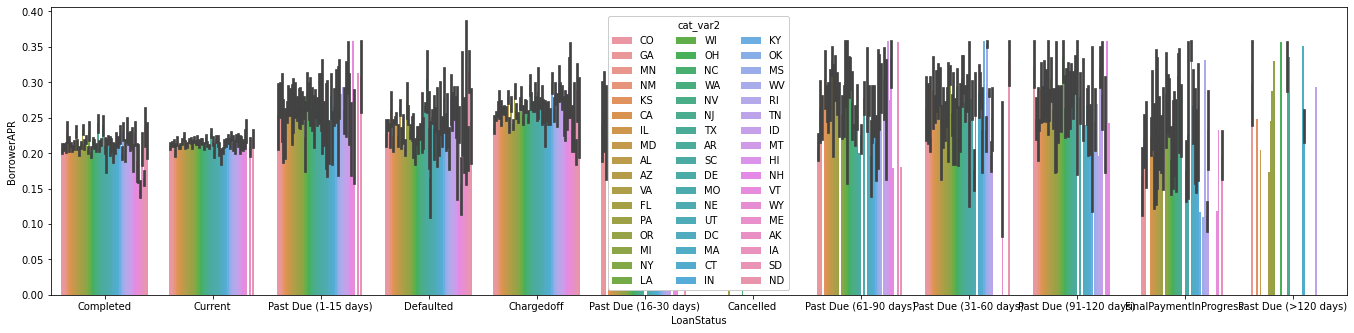

In [71]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])

ax = sb.barplot(data = df, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'BorrowerState')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

Since this is very hard to read. We first take a look at those state that have different behaviour in previous analysis(MD, SD, ND, AL, OR, IA, LA, ME, VT).

In [72]:
df_MD = df_group_pastDue[df_group_pastDue['BorrowerState'] == 'MD']
df_SD = df_group_pastDue[df_group_pastDue['BorrowerState'] == 'SD']
df_ND = df_group_pastDue[df_group_pastDue['BorrowerState'] == 'ND']
df_AL = df_group_pastDue[df_group_pastDue['BorrowerState'] == 'AL']
df_OR = df_group_pastDue[df_group_pastDue['BorrowerState'] == 'OR']
df_IA = df_group_pastDue[df_group_pastDue['BorrowerState'] == 'IA']
df_LA = df_group_pastDue[df_group_pastDue['BorrowerState'] == 'LA']
df_ME = df_group_pastDue[df_group_pastDue['BorrowerState'] == 'ME']
df_VT = df_group_pastDue[df_group_pastDue['BorrowerState'] == 'VT']
df_AR = df_group_pastDue[df_group_pastDue['BorrowerState'] == 'AR']

frames = [df_MD, df_SD, df_ND,df_AL,df_OR,df_IA,df_LA,df_ME,df_VT,df_AR]
result = pd.concat(frames)

In [73]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])

ax = sb.barplot(data = result, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'BorrowerState')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

The higher Borrower APR are from AR and AL.
AR has a higher borrower AR in defaulted load status.
AR and AL have a higher borrower AR in past due load status.

The lower Borrower APR are from ME and IA.
ME and IA in all load stauts are having a load borrower APR.

Amoung the smaller Borrower APR, the highest is SD. And SD have a high borrower APR in defaulted and past due load status.

**LoanStatus vs EmploymentStatus vs BorrowerAPR**

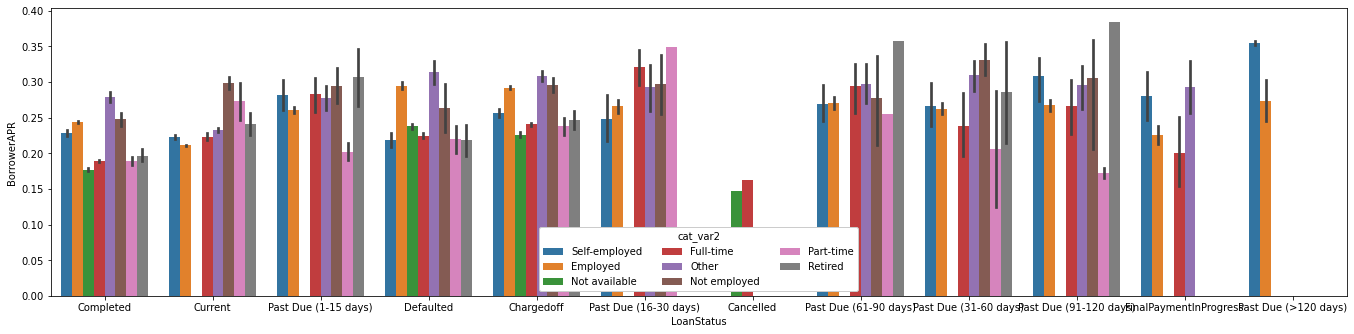

In [74]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])

ax = sb.barplot(data = df, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

In [75]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])

ax = sb.barplot(data = df_group_pastDue, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

Employed people are having a higher borrowerAPR than others in defaulted load status.

Self employed people are having a higher borrowerAPR than others in final payment progress.

Not employed people are having a high borrower APR in current and past due load status.

# Explanatory Data

In these dataset, we would like to explore the main variable of interest: LoanStatus, BorrowerAPR and BorrowerRate.
With the relationship with other important varibale: BorrowerState, EmploymentStatus, Investors.

## Univariate Exploration
### LoanStatus
The most loan status are **completed** and **current**. We have 49.7% of current load status and 33.4% of completed status.

In [59]:
plt.figure(figsize = [8,8])
sorted_counts = df_group_pastDue['LoanStatus'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%',startangle = 90, counterclock = False);
plt.title('LoanStatus percentage')
plt.axis('square')

(-1.1032478348077908,
 1.1030778448419476,
 -1.1037529619968713,
 1.102572717652867)

### BorrowerState
he most loan borrower state is **CA**, about 1/8 of the total amount. 

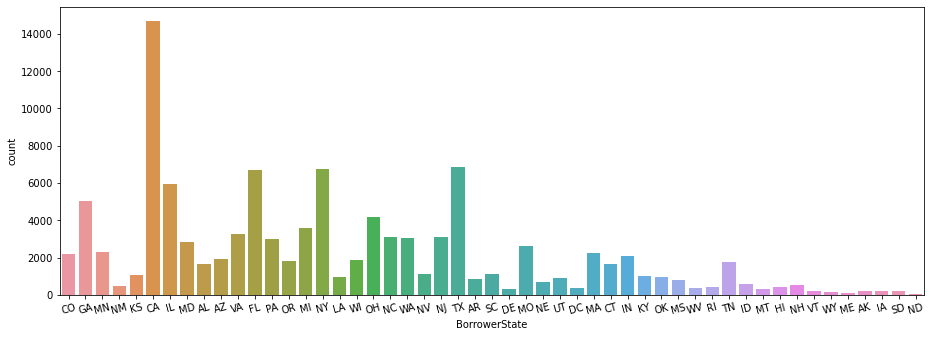

In [56]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
sb.countplot(data=df, x='BorrowerState');
plt.xticks(rotation=15);

### EmploymentStatus

The most employment status is **employed**, then is **full-time**. More than 50% are employed, about 45% are full-time.

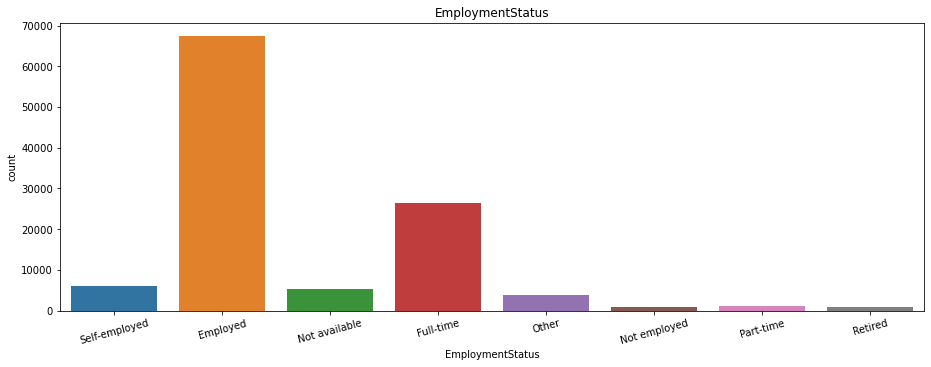

In [106]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
sb.countplot(data=df, x='EmploymentStatus');
plt.title('EmploymentStatus')
plt.xticks(rotation=15);

## Bivariate Exploration
### LoanStatus vs BorrowerState

The state have more loan are **CA**, **FL**, **IL**, **NY** and **TX**.
All of them have more current loan, then completed loan.
Completed CA loan amount is larger than other current loan in other state.

In [62]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 2, 1])
ct_counts = df_group_pastDue.groupby(['LoanStatus', 'BorrowerState']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'BorrowerState', values = 'count')

sb.heatmap(ct_counts).set_title("LoanStatus vs BorrowerState")


Text(0.5, 1.0, 'LoanStatus vs BorrowerState')



### LoanStatus vs EmploymentStatus

The largest amount of loan are belongs to **current+employed**.
Then is **full-time+completed**, **completed+employed**.

In [107]:
ct_counts = df_group_pastDue.groupby(['LoanStatus', 'EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')

sb.heatmap(ct_counts)

<AxesSubplot:xlabel='EmploymentStatus', ylabel='LoanStatus'>

### BorrowerAPR

The mean of borrowerAPR be 0.218827655909788. Here is a high density around 0.36.
We would like to explore what affects the borrower’s APR .

Combined with LoanStatus vs EmploymentStatus

### LoanStatus vs EmploymentStatus vs BorrowerAPR


Employed people are having a higher borrowerAPR than others in defaulted load status.

Self employed people are having a higher borrowerAPR than others in final payment progress.

Not employed people are having a high borrower APR in current and past due load status.

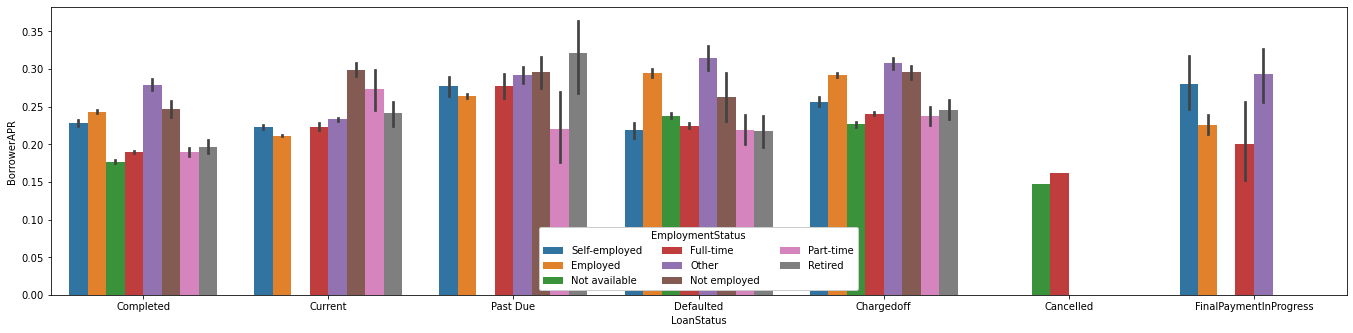

In [109]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])

ax = sb.barplot(data = df_group_pastDue, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'EmploymentStatus')

### LoanStatus vs BorrowerAPR

**Completed** loan status has lowest borrowerAPR. **PastDue(91-120 days)** has the highest borrowerAPR.

If we group past due together, **past due** still has the highest borrowerAPR.
Completed loan status has the largest range of borrowerAPR. Canceled loan status has the narrowest range of borrowerAPR.

Text(0.5, 1.0, 'big')

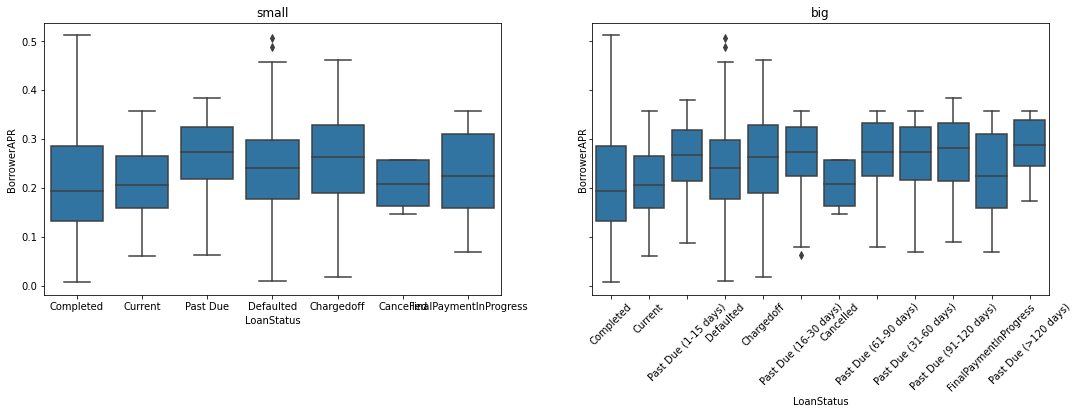

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

sb.boxplot(ax=axes[0],data=df_group_pastDue, x='LoanStatus', y='BorrowerAPR', color=base_color)
axes[0].set_title('group past day category')
plt.xticks(rotation=45);

sb.boxplot(ax=axes[1],data=df, x='LoanStatus', y='BorrowerAPR', color=base_color)
axes[1].set_title('original')

###  BorrowerAPR vs BorrowerState

The higher Borrower APR are from AR and AL and MS.
The lower Borrower APR are from ME and IA.

Among smaller BorrowerAPR  and larger BorrowerAPR, the highest and lowest states are different.
Among the larger Borrower APR, the highest is LA, lowest is ME.
Among the smaller Borrower APR, the highest is SD, lowest is VT.

Text(0.5, 1.0, 'BorrowerAPR vs BorrowerState')

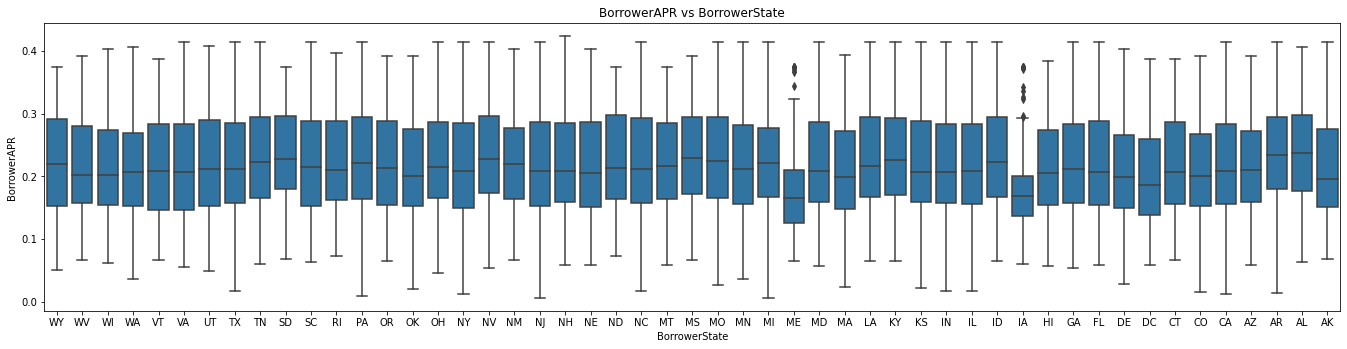

In [91]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])
my_order = df.groupby(by=["BorrowerState"])["BorrowerAPR"].mean().iloc[::-1].index

sb.boxplot(data=df, y='BorrowerAPR', x='BorrowerState', color=base_color,order=my_order)
plt.title('BorrowerAPR vs BorrowerState')

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(30, 5), sharey=True)
sb.boxplot(ax=axes[0],data=df_APR_small, y='BorrowerAPR', x='BorrowerState', color=base_color)
axes[0].set_title('smaller BorrowerAPR')

sb.boxplot(ax=axes[1],data=df_APR_big, y='BorrowerAPR', x='BorrowerState', color=base_color)
axes[1].set_title('larger BorrowerAPR')

Text(0.5, 1.0, 'larger BorrowerAPR')

### BorrowerAPR vs EmploymentStatus

The higher Borrower APR are from not employed.
The lower Borrower APR are from part-time.

Among the larger Borrower APR, the highest is not employed, lowest is unknown(not available).
Among the smaller Borrower APR, the highest is other status, lowest is full-time.

Text(0.5, 1.0, 'BorrowerAPR vs EmploymentStatus')

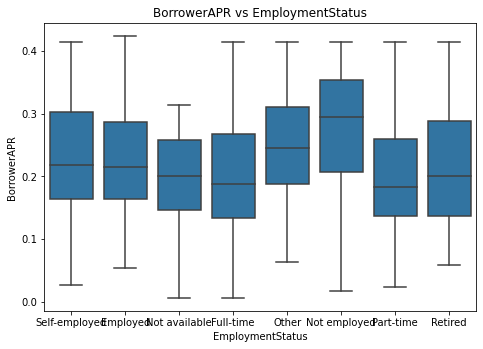

In [86]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 1, 1])
sb.boxplot(data=df, y='BorrowerAPR', x='EmploymentStatus', color=base_color)
plt.title('BorrowerAPR vs EmploymentStatus')

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

sb.boxplot(ax=axes[0],data=df_APR_small, y='BorrowerAPR', x='EmploymentStatus', color=base_color)
axes[0].set_title('smaller Borrower APR')

sb.boxplot(ax=axes[1],data=df_APR_big, y='BorrowerAPR', x='EmploymentStatus', color=base_color)
axes[1].set_title('larger Borrower APR')

Text(0.5, 1.0, 'larger Borrower APR')

### LoanStatus vs BorrowerState vs BorrowerAPR

We choose States that have standout behaviour to analysis.

The higher Borrower APR are from AR and AL.
AR has a higher borrower AR in defaulted load status.
AR and AL have a higher borrower AR in past due load status.

The lower Borrower APR are from ME and IA.
ME and IA in all load status are having a load borrower APR.

Amoung the smaller Borrower APR, the highest is SD. And SD have a high borrower APR in defaulted and past due load status.

Text(0.5, 1.0, 'LoanStatus vs BorrowerState vs BorrowerAPR')

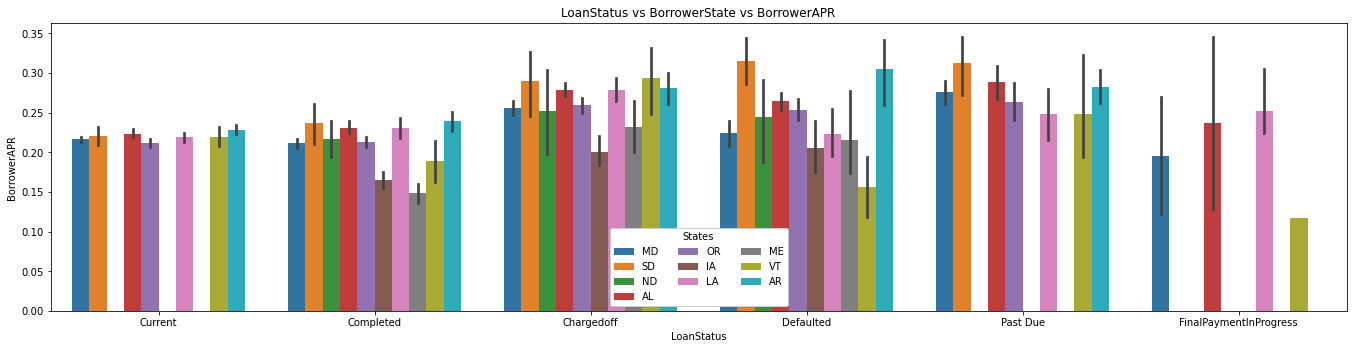

In [105]:
fig = plt.figure()
ax = fig.add_axes([.0, .0, 3, 1])

ax = sb.barplot(data = result, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'BorrowerState')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'States')
plt.title('LoanStatus vs BorrowerState vs BorrowerAPR')